In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\RUDRA JAWANE\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [4]:
visa_df=pd.read_csv(r"C:\Users\RUDRA JAWANE\Documents\Naresh IT\DataType/Visadataset.csv")
visa_df.head(6)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
5,EZYV06,Asia,Master's,Y,N,2339,2012,South,78252.1400,Year,Y,Certified


**Box Plot**

- box plot is used for detect the outliers

- box plot has min q1 q2 q3 and max value 

- inside box plot red line represent median which 50 percentile data 

**Outlier**

- very very huge observation

- very very small observation

- Which pull the data in any side of thee distribution

- Mild Outliers 

   - q1 - 1.5 IQR  and  q3 + 1.5 IQR
    
- Strong outliers

   - q1 - 3 IQR  and q3 + 3 IQR

- IQR : Inter Quartile range 
    
    - IQR= Q3 - Q1
    
    
- q1 : 25p 

- q2 : 50p 
    
- q3 : 75p 
    
    
                    
                                   Q1-1.5IQR     Q1       Median     Q3        Q3+1.5IQR
        
<img src="https://editor.analyticsvidhya.com/uploads/12311IQR.png" id="img" style="width: 481px; height: 240px;">
                                        

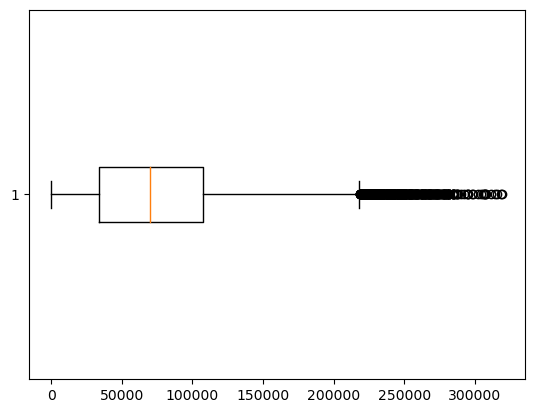

In [9]:
plt.boxplot(visa_df["prevailing_wage"],vert=False)
plt.show()

<Axes: >

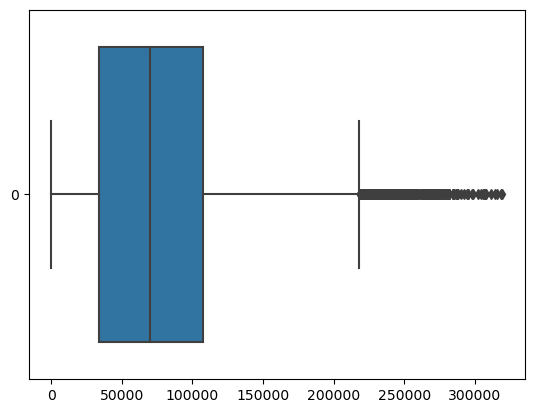

In [12]:
sns.boxplot(visa_df['prevailing_wage'], orient='h')

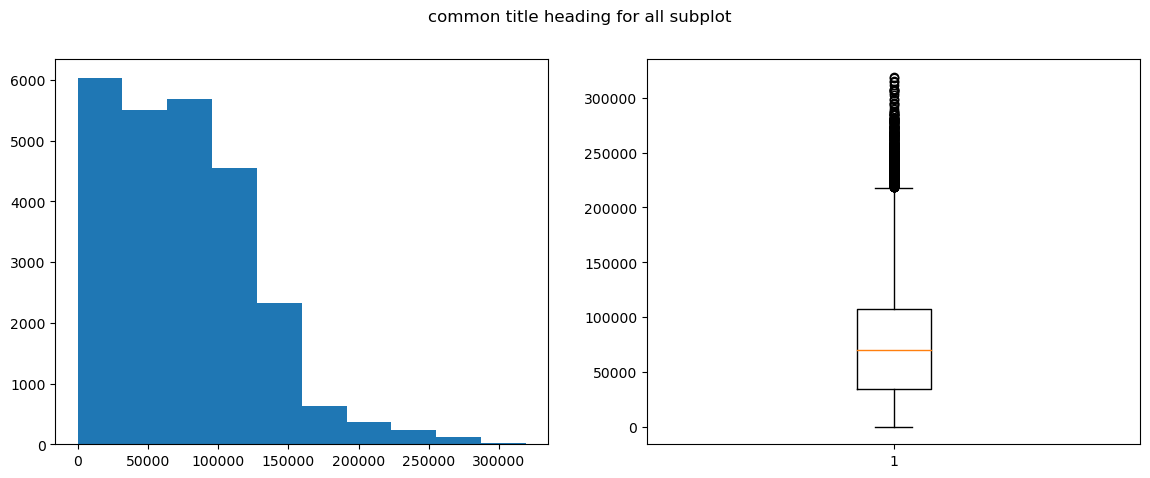

In [16]:
plt.figure(figsize=(14,5))
plt.suptitle('common title heading for all subplot')
plt.subplot(1,2,1).hist(visa_df['prevailing_wage'])
plt.subplot(1,2,2).boxplot(visa_df['prevailing_wage'])
plt.show()


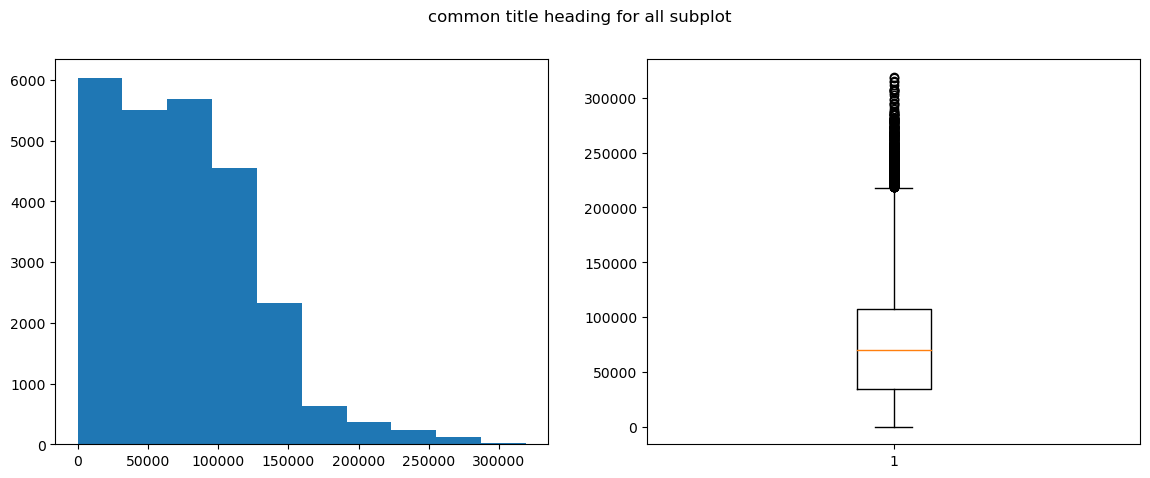

In [17]:
plt.figure(figsize=(14,5))
plt.suptitle('common title heading for all subplot')
plt.subplot(1,2,1)
plt.hist(visa_df['prevailing_wage'])
plt.subplot(1,2,2)
plt.boxplot(visa_df['prevailing_wage'])
plt.show()


**Finding the Outliers**

- outliers are avaialible less than q1 - 1.5*IQR

- Outliers are availible greater than q3 + 1.5*IQR


- Step-1:
    
     - calculate Q1: 25p
            
    - calculate Q3 : 75p 
      
    - calculate IQR: Q3-Q1
        
        
- Step-2 

    - LB = Q1-1.5*IQR
    
    - UB = Q3+1.5*IQR
    

    
- Step-3:
    
    - con1= visa_df['prevailing_wage']<LB
    - con2= visa_df['prevailing_wage']>UB
    - apply Or operator and get the outliers data 

**Outliers Data**

In [26]:
Q1= round(np.percentile(visa_df['prevailing_wage'],25),2)
Q3= round(np.percentile(visa_df['prevailing_wage'],75),2)
IQR=Q3-Q1
LB= Q1-1.5*IQR
UB= Q3+1.5*IQR
con1=visa_df['prevailing_wage']<LB
con2=visa_df['prevailing_wage']>UB
outliers_data=visa_df[con1 | con2]
len(outliers_data)

427

**Non Outliers data**

In [28]:
Q1= round(np.percentile(visa_df['prevailing_wage'],25),2)
Q3= round(np.percentile(visa_df['prevailing_wage'],75),2)
IQR=Q3-Q1
LB= Q1-1.5*IQR
UB= Q3+1.5*IQR
con1=visa_df['prevailing_wage']>LB
con2=visa_df['prevailing_wage']<UB
non_outliers_data=visa_df[con1 & con2]
len(non_outliers_data)

25053

**Histogram and boxplot for non outliers data**

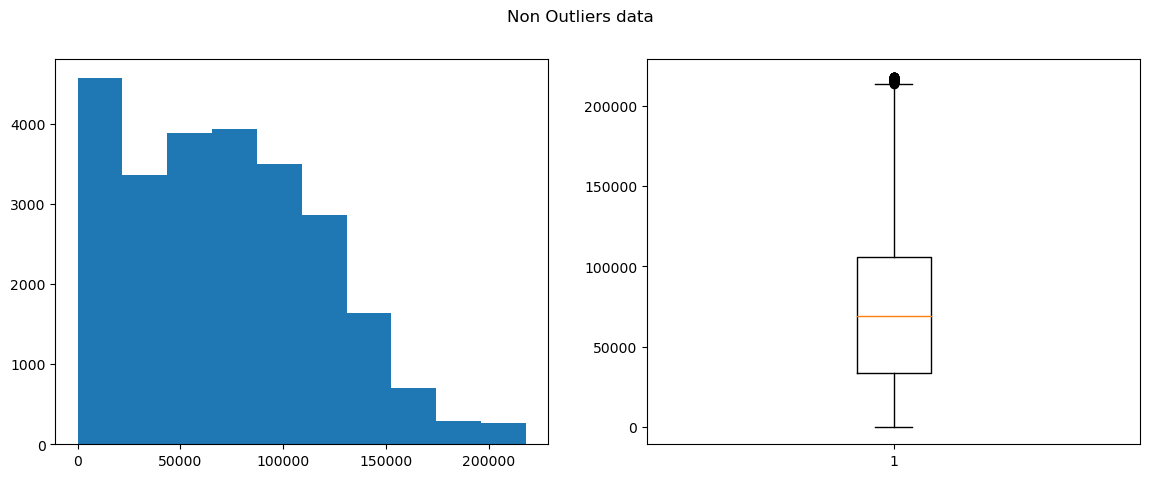

In [30]:
plt.figure(figsize=(14,5))
plt.suptitle("Non Outliers data")
plt.subplot(1,2,1).hist(non_outliers_data['prevailing_wage'])  #25053
plt.subplot(1,2,2).boxplot(non_outliers_data['prevailing_wage']) #25053
plt.show()

**Comparing Total data with non outliers data**

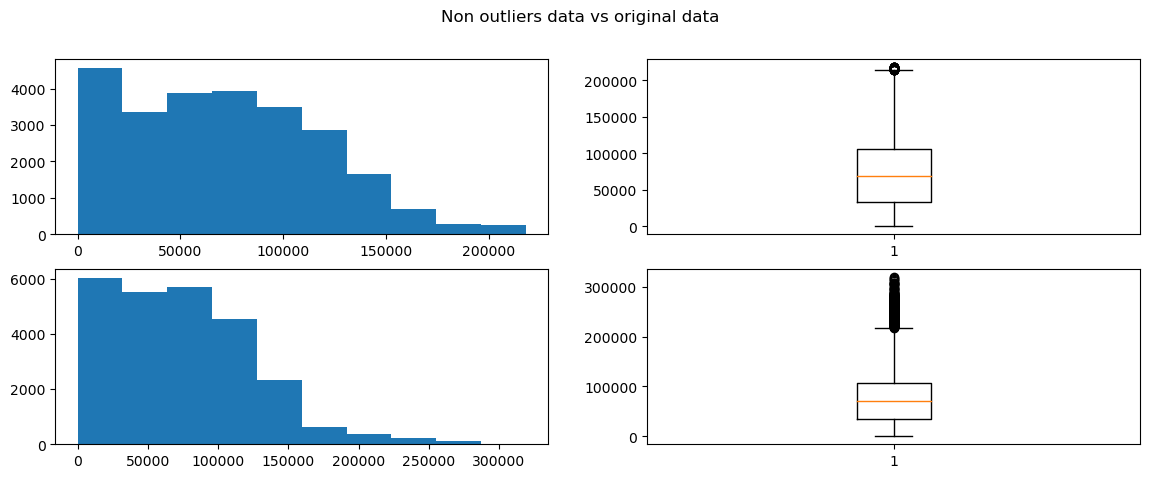

In [32]:
plt.figure(figsize=(14,5))    # 14 units in x axis 5 units in y axis

plt.suptitle('Non outliers data vs original data')
plt.subplot(2,2,1).hist(non_outliers_data['prevailing_wage'])  #25053
plt.subplot(2,2,2).boxplot(non_outliers_data['prevailing_wage']) #25053

plt.subplot(2,2,3).hist(visa_df['prevailing_wage'])  #25480
plt.subplot(2,2,4).boxplot(visa_df['prevailing_wage']) #25480
plt.show()

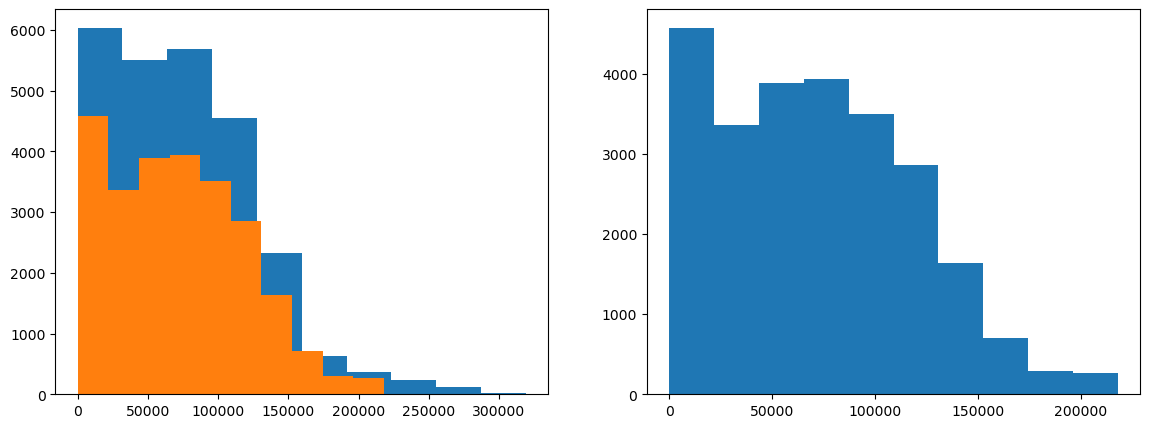

In [34]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1).hist(visa_df['prevailing_wage'])
plt.subplot(1,2,1).hist(non_outliers_data['prevailing_wage'])
plt.subplot(1,2,2).hist(non_outliers_data['prevailing_wage'])
plt.show()

**How to Deal the Outliers**

**Method-1 : Drop the outliers**

   - Drop the outlires is not a good idea
       
   - When you drop the outlires ,data will loss 

   - For example here we are droping 427 rows 

   - x% of 25480=427

   - It is 1.7% data ,here it is fine we can drop the outlier
    
**Method-2 :Fill with median value**
        
   - We already konw that outliers does not affect the median
        
   - so we can fill outliers by median 
        
        
  **Method-3 : Cap the values with Q1 and Q3**
            
   - at lessthan lower Bound values , We can replce with q1 or LB
          
   - All greater than upper bound values, We can Replace with Q3 or UB
            
            
 **Fill with median**
            
   - create a empty list 
                
   - calculate median value visa_df['prevalilng_wage'].median
                
   - iterate through visa_df['prevailing_wage'].values
                
   - if each values  i.e i, ub then append with median values
                
   - else append with i value

In [38]:
for i in visa_df['prevailing_wage'].values:
    if i<lb or i>ub:

SyntaxError: incomplete input (297411677.py, line 2)